In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('fr-esr-parcoursup.csv', sep=';', encoding='utf-8')

# Afficher les premières lignes du dataframe
df

,Session,"Statut de l’établissement de la filière de formation (public, privé…)",Code UAI de l'établissement,Établissement,Code départemental de l’établissement,Département de l’établissement,Région de l’établissement,Académie de l’établissement,Commune de l’établissement,Filière de formation,...,tri,cod_aff_form,Concours communs et banque d'épreuves,Lien de la formation sur la plateforme Parcoursup,Taux d’accès,Part des terminales générales qui étaient en position de recevoir une proposition en phase principale,Part des terminales technologiques qui étaient en position de recevoir une proposition en phase principale,Part des terminales professionnelles qui étaient en position de recevoir une proposition en phase principale,etablissement_id_paysage,composante_id_paysage
0,2024,Public,0331766R,Université Bordeaux Montaigne,33.0,Gironde,Nouvelle Aquitaine,Bordeaux,Pessac,Licence - Portail Philosophie - Licence 1 Phil...,...,1_universités,4424,NaN,https://dossier.parcoursup.fr/Candidats/public...,100.0,91.0,7.0,3.0,Mz90U,NaN
1,2024,Privé enseignement supérieur,0592807F,"Faculté de Médecine, Maïeutique, Sciences de l...",59.0,Nord,Hauts-de-France,Lille,Lille,Licence - Pluridisciplinaire - Sciences pour l...,...,1_universités,44310,NaN,https://dossier.parcoursup.fr/Candidats/public...,100.0,97.0,3.0,0.0,NaN,NaN
2,2024,Public,0811293R,Institut national universitaire Champollion,81.0,Tarn,Occitanie,Toulouse,Albi,"CUPGE - Physique, Chimie - Parcours Cycle Ingé...",...,3_Autres formations,44311,NaN,https://dossier.parcoursup.fr/Candidats/public...,75.0,99.0,1.0,0.0,Hm42K,NaN
3,2024,Public,0130072H,Lycée professionnel Ampere,13.0,Bouches-du-Rhône,Provence-Alpes-Côte d'Azur,Aix-Marseille,Marseille 10e Arrondissement,Certificat de Spécialisation - Cybersécurité,...,3_Autres formations,44314,NaN,https://dossier.parcoursup.fr/Candidats/public...,92.0,29.0,11.0,61.0,NaN,NaN
4,2024,Privé enseignement supérieur,0492180D,IFEPSA - Facultés libres de l'ouest - UCO,49.0,Maine-et-Loire,Pays-de-la-Loire,Nantes,Les Ponts-de-Cé,Licence - Sciences et Techniques des Activités...,...,1_universités,44320,NaN,https://dossier.parcoursup.fr/Candidats/public...,19.0,94.0,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,2024,Public,0597132G,Université Polytechnique Hauts-de-France,59.0,Nord,Hauts-de-France,Lille,Aulnoy-lez-Valenciennes,Licence - Pluridisciplinaire - Parcours Sporti...,...,1_universités,44148,NaN,https://dossier.parcoursup.fr/Candidats/public...,40.0,92.0,8.0,0.0,EW53M,NaN
14075,2024,Public,0211237F,Université de Bourgogne - site de Dijon,21.0,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,Dijon,Licence - Langues étrangères appliquées - Parc...,...,1_universités,44150,NaN,https://dossier.parcoursup.fr/Candidats/public...,46.0,93.0,5.0,3.0,Lr94O,NaN
14076,2024,Public,0171463Y,La Rochelle Université,17.0,Charente-Maritime,Nouvelle Aquitaine,Poitiers,La Rochelle,Licence - Portail Sciences pour la santé - Ac...,...,1_universités,44207,NaN,https://dossier.parcoursup.fr/Candidats/public...,26.0,99.0,1.0,0.0,atbEK,NaN
14077,2024,Public,0681166Y,Université de Mulhouse,68.0,Haut-Rhin,Grand-Est,Strasbourg,Mulhouse,"Licence - Electronique, énergie électrique, au...",...,1_universités,44214,NaN,https://dossier.parcoursup.fr/Candidats/public...,99.0,74.0,18.0,9.0,OJZ4a,NaN


In [16]:
print(df['Session'].unique())

[2024]


# QUESTIONS BEFORE WORKSHOP

In [7]:
# Afficher les colonnes disponibles pour vérifier le nom exact
print(df.columns.tolist())


['Session', 'Statut de l’établissement de la filière de formation (public, privé…)', "Code UAI de l'établissement", 'Établissement', 'Code départemental de l’établissement', 'Département de l’établissement', 'Région de l’établissement', 'Académie de l’établissement', 'Commune de l’établissement', 'Filière de formation', 'Sélectivité', 'Filière de formation très agrégée', 'Filière de formation détaillée', 'Filière de formation.1', 'Filière de formation détaillée bis', 'Filière de formation très détaillée', 'Coordonnées GPS de la formation', 'Capacité de l’établissement par formation', 'Effectif total des candidats pour une formation', 'Dont effectif des candidates pour une formation', 'Effectif total des candidats en phase principale', 'Dont effectif des candidats ayant postulé en internat', 'Effectif des candidats néo bacheliers généraux en phase principale', 'Dont effectif des candidats boursiers néo bacheliers généraux en phase principale', 'Effectif des candidats néo bacheliers tech

In [9]:
# Sélection et tri des colonnes pertinentes
colonnes = ['Filière de formation', 'Établissement', 'Effectif total des candidats pour une formation', 'Taux d’accès']
top_formations = df[colonnes].sort_values(
    by='Effectif total des candidats pour une formation',
    ascending=False
).head(10)

# Résultat sous forme de DataFrame
top_formations.reset_index(drop=True, inplace=True)
top_formations

,Filière de formation,Établissement,Effectif total des candidats pour une formation,Taux d’accès
0,Formation d'ingénieur Bac + 5 - Bac Général,INSA Lyon,17430,10.0
1,Formation d'ingénieur Bac + 5 - Bac Général,INSA Toulouse,16471,11.0
2,Licence - Droit,Université Paris 1 Panthéon Sorbonne,15170,15.0
3,Licence - Droit,Université Paris Panthéon Assas,15019,14.0
4,Licence - Parcours d'Accès Spécifique Santé (P...,Université Paris Cité,14226,32.0
5,Formation d'ingénieur Bac + 5 - Bac Général,INSA Rennes,14199,18.0
6,Formation d'ingénieur Bac + 5 - Bac Général,INSA Strasbourg,13552,23.0
7,Licence - Parcours d'Accès Spécifique Santé (P...,Sorbonne université,13398,37.0
8,Licence - Portail Psychologie - Sciences Psych...,Université Paris Cité,13299,22.0
9,Licence - Parcours d'Accès Spécifique Santé (P...,Université Paris Cité,13156,5.0


# QUESTION 3: Parmi les formations qui requièrent la spé maths, lesquelles ont le plus de candidats ?

In [10]:
import pandas as pd

# Lire le fichier CSV
df_2 = pd.read_csv('fr-esr-parcoursup-enseignements-de-specialite-bacheliers-generaux.csv', sep=';', encoding='utf-8')

# Afficher les premières lignes du dataframe
df_2

,Enseignements de spécialité,Formation,Nombre de candidats bacheliers ayant confirmé au moins un vœu,Nombre de candidats bacheliers ayant reçu au moins une proposition d'admission,Nombre de candidats bacheliers ayant accepté une proposition d'admission
0,"Arts,Arts",Licence AES,1,1.0,0
1,"Arts,Arts",Licence Chimie,0,0.0,0
2,"Arts,Arts",Licence Formation générale aux métiers de l'in...,0,0.0,0
3,"Arts,Arts",Licence Pluri Droit - Sciences éco - AES,0,0.0,0
4,"Arts,Arts",Licence Sciences de gestion,0,0.0,0
...,...,...,...,...,...
3960,"Sciences de l'ingénieur,Sciences de la vie et ...","Licence Psychlogie, Sciences cognitives",9,6.0,3
3961,"Sciences de l'ingénieur,Sciences de la vie et ...",Licence Sciences de l'information et de la com...,6,4.0,1
3962,"Sciences de l'ingénieur,Sciences de la vie et ...","Licence Sciences de la vie, biologie, santé",41,20.0,6
3963,"Sciences de l'ingénieur,Sciences de la vie et ...","Licence Sociologie, Démographie",6,6.0,0


In [12]:
# Filtrer les lignes où la spécialité contient "Mathématiques"
df_math = df_2[df_2['Enseignements de spécialité'].str.contains('Mathématiques', na=False)]

# Trier les formations les plus demandées parmi celles avec spé maths
top_math = df_math[['Formation', 'Enseignements de spécialité', 
                    'Nombre de candidats bacheliers ayant confirmé au moins un vœu']] \
            .sort_values(by='Nombre de candidats bacheliers ayant confirmé au moins un vœu', ascending=False) \
            .head(10)

# Afficher le DataFrame
top_math.reset_index(drop=True, inplace=True)
top_math

,Formation,Enseignements de spécialité,Nombre de candidats bacheliers ayant confirmé au moins un vœu
0,Ensemble des candidats bacheliers,"Mathématiques,Physique-Chimie",72479
1,CPGE S,"Mathématiques,Physique-Chimie",39083
2,Ecoles d'Ingénieurs,"Mathématiques,Physique-Chimie",28033
3,Licence Mathématiques,"Mathématiques,Physique-Chimie",27955
4,BUT Production,"Mathématiques,Physique-Chimie",26549
5,Ensemble des candidats bacheliers,"Mathématiques,Sciences de la vie et de la terre",26123
6,Ensemble des candidats bacheliers,"Mathématiques,Sciences économiques et sociales",23782
7,Licence Las,"Mathématiques,Physique-Chimie",21612
8,PASS,"Mathématiques,Physique-Chimie",15729
9,Licence Las,"Mathématiques,Sciences de la vie et de la terre",14088


In [13]:
print(df_2.columns.tolist())


['Enseignements de spécialité', 'Formation', 'Nombre de candidats bacheliers ayant confirmé au moins un vœu', "Nombre de candidats bacheliers ayant reçu au moins une proposition d'admission", "Nombre de candidats bacheliers ayant accepté une proposition d'admission"]


# QUESTION 4: Quelles sont les 5 formations avec la plus forte croissance ?

In [29]:
# Liste des fichiers CSV pour chaque année
fichiers = [
    'fr-esr-parcoursup-2019.csv',
    'fr-esr-parcoursup_2020.csv',
    'fr-esr-parcoursup_2021.csv',
    'fr-esr-parcoursup_2022.csv',
    'fr-esr-parcoursup_2023.csv',
    'fr-esr-parcoursup.csv'
]

# Charger et concaténer tous les fichiers
datasets = [pd.read_csv(fichier, sep=';', encoding='utf-8') for fichier in fichiers]
df_merged = pd.concat(datasets, ignore_index=True)

# Afficher un aperçu du dataset fusionné
df_merged

,Session,"Statut de l’établissement de la filière de formation (public, privé…)",Code UAI de l'établissement,Établissement,Code départemental de l’établissement,Département de l’établissement,Région de l’établissement,Académie de l’établissement,Filière de formation très agrégée,Filière de formation,...,Dont % d’admis avec mention (BP),list_com,Taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le nombre vœux PP),etablissement_id_paysage,composante_id_paysage,cod_aff_form,Taux d’accès,Part des terminales générales qui étaient en position de recevoir une proposition en phase principale,Part des terminales technologiques qui étaient en position de recevoir une proposition en phase principale,Part des terminales professionnelles qui étaient en position de recevoir une proposition en phase principale
0,2019,Public,0333269Z,La Prépa des INP - Groupe INP - Bordeaux,33,Gironde,Nouvelle-Aquitaine,Bordeaux,Autre formation,Formations d'ingénieurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Public,0382881A,Polytech Grenoble,38,Isère,Auvergne-Rhône-Alpes,Grenoble,Autre formation,Formations d'ingénieurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Public,0492226D,ISTIA - Polytech Angers,49,Maine-et-Loire,Pays de la Loire,Nantes,Autre formation,Formations d'ingénieurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Public,0540130Y,Polytech Nancy,54,Meurthe-et-Moselle,Grand Est,Nancy-Metz,Autre formation,Formations d'ingénieurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Public,0542307P,ENSGSI Nancy - Groupe INP,54,Meurthe-et-Moselle,Grand Est,Nancy-Metz,Autre formation,Formations d'ingénieurs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79320,2024,Public,0597132G,Université Polytechnique Hauts-de-France,59.0,Nord,Hauts-de-France,Lille,Licence,Licence - Pluridisciplinaire - Parcours Sporti...,...,0.0,Liste d'appel commune à plusieurs formations,NaN,EW53M,NaN,44148.0,40.0,92.0,8.0,0.0
79321,2024,Public,0211237F,Université de Bourgogne - site de Dijon,21.0,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,Licence,Licence - Langues étrangères appliquées - Parc...,...,0.0,Liste d'appel commune à plusieurs formations,NaN,Lr94O,NaN,44150.0,46.0,93.0,5.0,3.0
79322,2024,Public,0171463Y,La Rochelle Université,17.0,Charente-Maritime,Nouvelle Aquitaine,Poitiers,Licence_Las,Licence - Portail Sciences pour la santé - Ac...,...,0.0,Liste d'appel commune à plusieurs formations,NaN,atbEK,NaN,44207.0,26.0,99.0,1.0,0.0
79323,2024,Public,0681166Y,Université de Mulhouse,68.0,Haut-Rhin,Grand-Est,Strasbourg,Licence,"Licence - Electronique, énergie électrique, au...",...,0.0,Liste d'appel commune à plusieurs formations,NaN,OJZ4a,NaN,44214.0,99.0,74.0,18.0,9.0


In [30]:
import pandas as pd

# 1. Sélection des colonnes utiles avec établissement pour éviter les doublons par nom de filière seul
df_growth = df_merged[['Session', 'Filière de formation', 'Établissement',
                       "Effectif total des candidats ayant accepté la proposition de l’établissement (admis)"]].copy()

# 2. Création d'un identifiant unique : formation + établissement
df_growth['Formation complète'] = df_growth['Filière de formation'] + " – " + df_growth['Établissement']

# 3. Conversion de l'année (session) en string
df_growth['Session'] = df_growth['Session'].astype(str)

# 4. Pivot pour mettre les années en colonnes
pivot = df_growth.pivot_table(index='Formation complète', 
                              columns='Session', 
                              values="Effectif total des candidats ayant accepté la proposition de l’établissement (admis)")

# 5. Vérification des colonnes (années)
print("✅ Années disponibles :", pivot.columns.tolist())

# 6. Filtrer uniquement les formations avec des données en 2020 et 2024
pivot_filtered = pivot.dropna(subset=['2020', '2024'])

# 7. Calcul des croissances
pivot_filtered['Croissance nette'] = pivot_filtered['2024'] - pivot_filtered['2020']
pivot_filtered['Croissance (%)'] = ((pivot_filtered['2024'] - pivot_filtered['2020']) / pivot_filtered['2020']) * 100

# 8. Trier par croissance relative
top_croissance = pivot_filtered.sort_values(by='Croissance (%)', ascending=False).head(10).reset_index()

# 9. Affichage du top 10
print("🎯 Top 10 des formations avec la plus forte croissance 2020–2024 :")
print(top_croissance.to_string(index=False))


✅ Années disponibles : ['2019', '2020', '2021', '2022', '2023', '2024']
🎯 Top 10 des formations avec la plus forte croissance 2020–2024 :
                                                                                    Formation complète  2019  2020      2021       2022  2023  2024  Croissance nette  Croissance (%)
                                          Diplôme National d'Art – Ecole supérieure d'art annecy alpes   NaN   4.0  0.000000  11.000000  34.0  39.0              35.0      875.000000
       Formation des écoles de commerce et de management – ESSEC Business School - Campus de Singapour   NaN  26.0 37.000000  40.000000  59.0  65.0              39.0      150.000000
           Formation des écoles de commerce et de management – NEOMA Business School - Campus de Paris   NaN  70.5 99.666667 117.333333 144.0 156.0              85.5      121.276596
                      Formation des écoles de commerce et de management – Grenoble Ecole de Management   NaN  26.0 36.000000        Na

/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_20112/1126057853.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_filtered['Croissance nette'] = pivot_filtered['2024'] - pivot_filtered['2020']
/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_20112/1126057853.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_filtered['Croissance (%)'] = ((pivot_filtered['2024'] - pivot_filtered['2020']) / pivot_filtered['2020']) * 100


# EDA

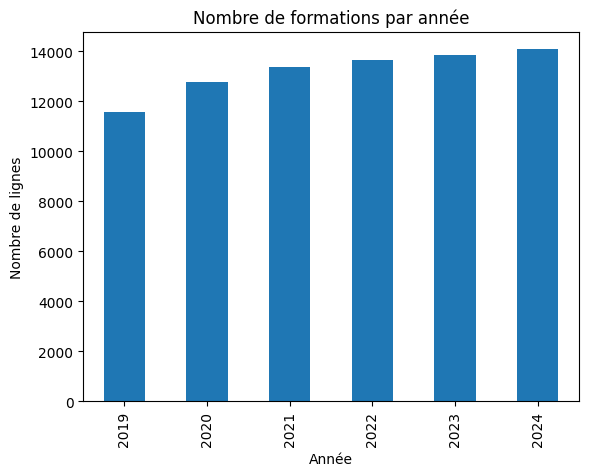

In [31]:
df_merged['Session'].value_counts().sort_index().plot(kind='bar', title="Nombre de formations par année")
plt.xlabel("Année")
plt.ylabel("Nombre de lignes")
plt.show()


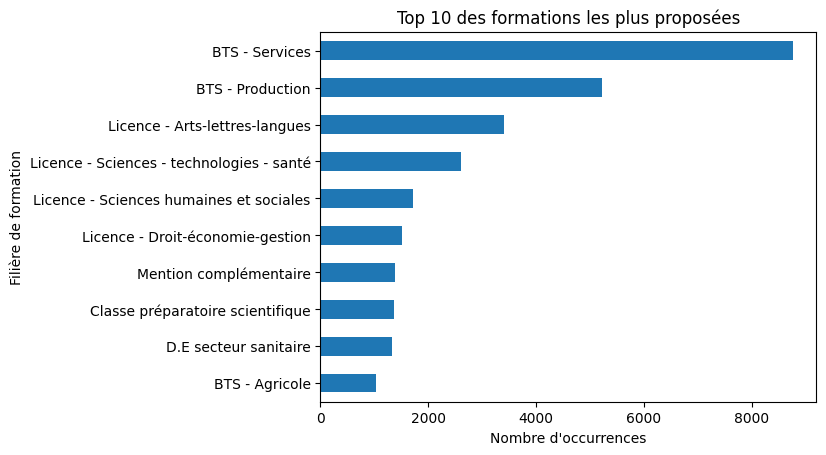

In [32]:
df_merged['Filière de formation'].value_counts().head(10).plot(kind='barh', title="Top 10 des formations les plus proposées")
plt.xlabel("Nombre d'occurrences")
plt.gca().invert_yaxis()
plt.show()


In [33]:
top_candidats = df_merged.groupby('Filière de formation')[ 
    'Effectif total des candidats pour une formation'
].sum().sort_values(ascending=False).head(10).reset_index()

top_candidats


,Filière de formation,Effectif total des candidats pour une formation
0,BTS - Services,5513739
1,D.E secteur sanitaire,4715972
2,Licence - Sciences - technologies - santé,4126847
3,D.E Infirmier,4102004
4,Licence - Parcours d'Accès Spécifique Santé (P...,2787804
5,Licence - Droit-économie-gestion,2315776
6,Licence - Sciences humaines et sociales,1936727
7,Classe préparatoire scientifique,1611834
8,Licence - Arts-lettres-langues,1442519
9,BTS - Production,1409347


### ❓ Question 1 – Quelles sont les meilleures formations post-bac sur Parcoursup ?

Dans cette première question, nous cherchons à identifier les formations les plus attractives et qualitatives. Pour cela, on peut considérer qu'une formation est "meilleure" si :

- Elle attire un grand nombre de candidats,
- Elle affiche un faible taux d’accès (signe de sélectivité),
- Elle bénéficie d’une forte croissance du nombre d’admis sur plusieurs années.

Nous allons explorer chacun de ces critères.


## Formations les plus demandées

In [34]:
top_candidats = df_merged.groupby('Filière de formation')[
    'Effectif total des candidats pour une formation'
].sum().sort_values(ascending=False).head(10).reset_index()

top_candidats


,Filière de formation,Effectif total des candidats pour une formation
0,BTS - Services,5513739
1,D.E secteur sanitaire,4715972
2,Licence - Sciences - technologies - santé,4126847
3,D.E Infirmier,4102004
4,Licence - Parcours d'Accès Spécifique Santé (P...,2787804
5,Licence - Droit-économie-gestion,2315776
6,Licence - Sciences humaines et sociales,1936727
7,Classe préparatoire scientifique,1611834
8,Licence - Arts-lettres-langues,1442519
9,BTS - Production,1409347


## Formations les plus sélectives

In [35]:
top_selective = df_merged[df_merged['Taux d’accès'].notna()]
top_selective = top_selective.groupby('Filière de formation')[
    'Taux d’accès'
].mean().sort_values().head(10).reset_index()

top_selective


,Filière de formation,Taux d’accès
0,DN MADE - Animation - Spécialité : Cinéma d'An...,1.0
1,"DN MADE - Mode - - Spécialité : Stylisme, imag...",1.0
2,"DN MADE - Mode - Spécialité : Savoir-faire, lu...",1.0
3,DN MADE - Ornement - Spécialité : Art et techn...,1.0
4,"DN MADE - Mode - Spécialité : Stylisme, image ...",1.0
5,"DN MADE - Mode - Spécialité : Collection, vête...",1.0
6,DN MADE - Graphisme - Spécialité : Designer gr...,1.5
7,DN MADE - Livre - Spécialité : Images et narra...,1.5
8,DN MADE - Graphisme - Spécialité : Design de m...,2.0
9,DN MADE - Ornement - Spécialité : Gravure orne...,2.0


In [39]:
# Évolution moyenne du nombre de candidats par filière
df_evol = df_merged.groupby(['Filière de formation', 'Session'])[
    'Effectif total des candidats pour une formation'
].sum().reset_index()

pivot_evol = df_evol.pivot(index='Filière de formation', columns='Session', values='Effectif total des candidats pour une formation')
pivot_evol['Évolution (%)'] = ((pivot_evol[2024] - pivot_evol[2020]) / pivot_evol[2020]) * 100
pivot_evol.sort_values('Évolution (%)', ascending=False).head(10)


Session,2019,2020,2021,2022,2023,2024,Évolution (%)
Filière de formation,,,,,,,
Diplôme National d'Art,NaN,3815.0,3805.0,7024.0,25217.0,25092.0,557.719528
Formation des écoles de commerce et de management,NaN,156082.0,203843.0,200962.0,216441.0,257519.0,64.989557
ARS Année de Remise à Niveau Scientifique,NaN,NaN,NaN,271.0,201.0,204.0,NaN
Année Préparatoire aux formations de Licence Mathématiques et Informatique (L0),NaN,NaN,NaN,48.0,50.0,16.0,NaN
Année de Réussite à Toulouse en Economie - Option économie gestion,NaN,NaN,NaN,NaN,476.0,306.0,NaN
Année de Réussite à Toulouse en Economie - Option économie gestion ou économie droit,NaN,NaN,NaN,653.0,NaN,NaN,NaN
Année préparatoire,9203.0,9618.0,8929.0,NaN,NaN,NaN,NaN
Année préparatoire - Année de préparation aux études scientifiques - Parcours Sciences de la Vie,NaN,NaN,NaN,NaN,46.0,60.0,NaN
"Année préparatoire - Mise à niveau scientifique - MAN SVTC (Sciences de la Vie et de la Terre Chimie) (Biologie, Géologie, Physique, Chimie, Maths)",NaN,NaN,NaN,259.0,185.0,229.0,NaN


## 📊 Analyse visuelle des formations Parcoursup

Nous allons représenter graphiquement :
- Les formations les plus populaires (en nombre de candidats),
- Les formations avec la plus forte croissance (2020 → 2024),
- La relation entre sélectivité et attractivité.

Ces visualisations permettent de mieux comprendre les dynamiques actuelles de l’enseignement supérieur.


In [41]:
# Nettoyage et agrégation
df_top_form = df_merged.copy()

# Grouper les candidats par formation (somme toutes années confondues)
top_candidats = df_top_form.groupby('Filière de formation')[
    'Effectif total des candidats pour une formation'
].sum().reset_index()

# Calcul du taux d’accès moyen par formation
taux_acces = df_top_form.groupby('Filière de formation')[
    'Taux d’accès'
].mean().reset_index()

# Fusionner les deux
df_plot = pd.merge(top_candidats, taux_acces, on='Filière de formation')

# On peut renommer pour plus de clarté
df_plot.rename(columns={
    'Filière de formation': 'Formation',
    'Effectif total des candidats pour une formation': 'Candidats',
    'Taux d’accès': 'Taux d\'accès (%)'
}, inplace=True)

# Garde les 15 formations les plus populaires
df_plot = df_plot.sort_values('Candidats', ascending=False).head(15)


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_20112/1044572915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Candidats', y='Formation', palette='Blues_d')


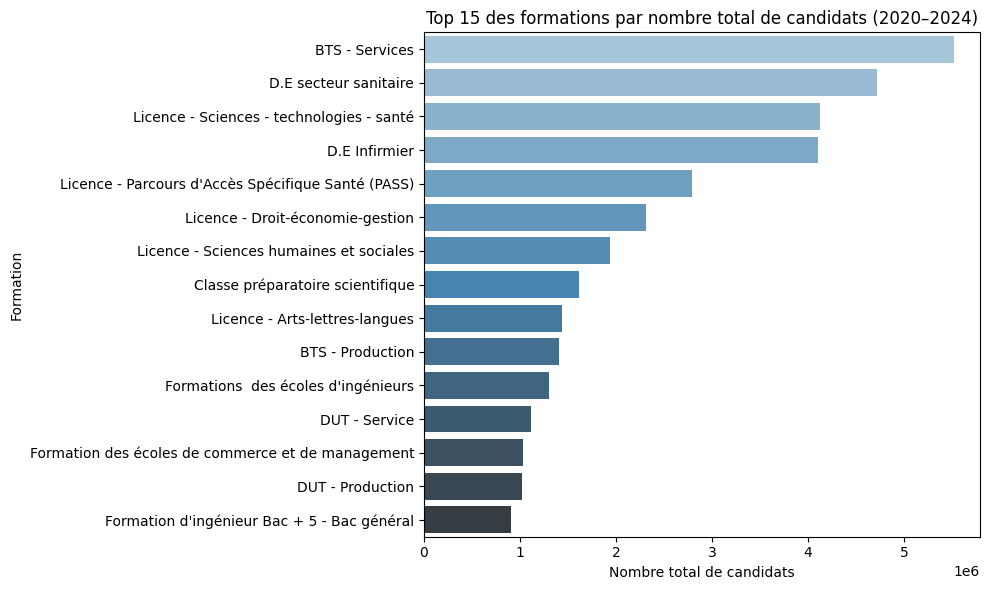

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Candidats', y='Formation', palette='Blues_d')
plt.title("Top 15 des formations par nombre total de candidats (2020–2024)")
plt.xlabel("Nombre total de candidats")
plt.ylabel("Formation")
plt.tight_layout()
plt.show()


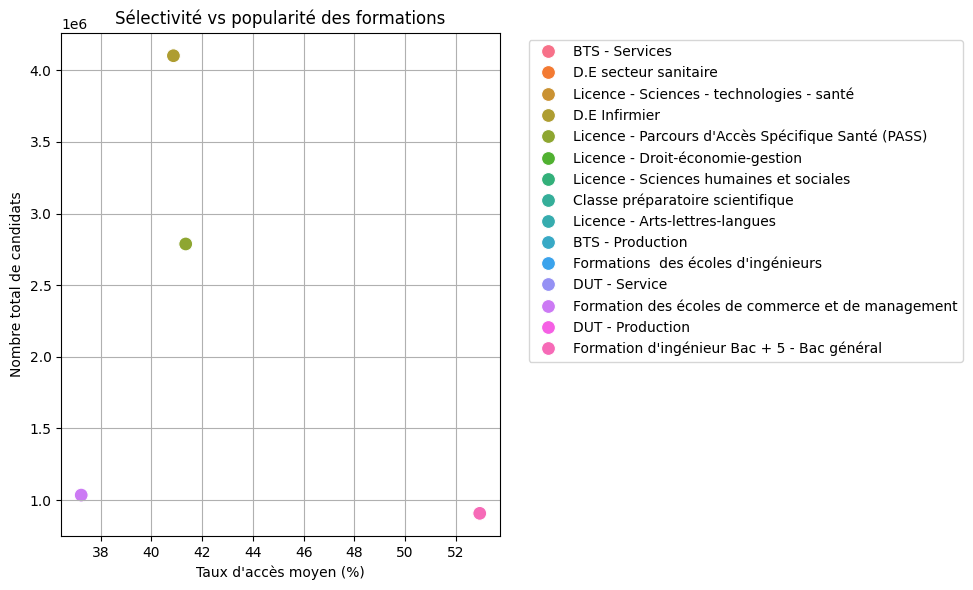

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Taux d\'accès (%)', y='Candidats', hue='Formation', s=100)
plt.title("Sélectivité vs popularité des formations")
plt.xlabel("Taux d'accès moyen (%)")
plt.ylabel("Nombre total de candidats")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### ❓ Question 2 – Combien de places ouvrir pour la 5e promotion Business & Data ?

La formation Business & Data a accueilli 33, 67, 110 puis 180 étudiants lors de ses quatre premières promotions. Nous allons modéliser cette croissance pour estimer la capacité d’accueil optimale pour la 5e promotion.


In [36]:
import numpy as np

effectifs = [33, 67, 110, 180]
annees = [1, 2, 3, 4]

# Régression linéaire
coeffs = np.polyfit(annees, effectifs, deg=1)
modele = np.poly1d(coeffs)

# Prédiction pour la 5e année
prevision = int(modele(5))
print(f"📌 Nombre conseillé de places pour la 5e promo : {prevision}")


📌 Nombre conseillé de places pour la 5e promo : 218


### ✅ Conclusion Question 2

La croissance suit une tendance régulière. Le modèle prévoit environ **218 étudiants** pour la prochaine promotion. Cela semble cohérent avec une stratégie de développement continue.


### ❓ Question 2 – Peut-on construire un modèle de croissance plus robuste ?

Nous disposons de 4 années d’historique :  
**33, 67, 110, 180 étudiants** pour les 4 premières promotions.

Nous allons tester plusieurs types de modèles de régression pour prédire le nombre optimal de places à ouvrir en 5e année :

- Régression linéaire,
- Régression quadratique,
- Régression exponentielle,
- Régression via scikit-learn avec affichage graphique.

L’objectif est de comparer ces modèles pour retenir la meilleure stratégie.


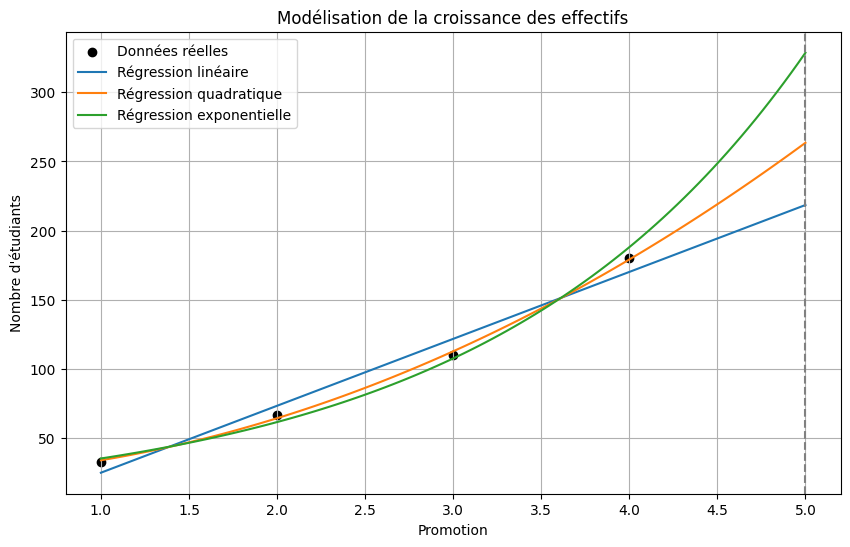

📊 Régression linéaire : 218 étudiants
📊 Régression quadratique : 263 étudiants
📊 Régression exponentielle : 328 étudiants


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Données
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([33, 67, 110, 180])

# --- Régression linéaire ---
model_lin = LinearRegression()
model_lin.fit(X, y)
y_pred_lin = model_lin.predict([[5]])

# --- Régression quadratique (degré 2) ---
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_quad = LinearRegression()
model_quad.fit(X_poly, y)
y_pred_quad = model_quad.predict(poly.transform([[5]]))

# --- Régression exponentielle ---
log_y = np.log(y)
model_exp = LinearRegression()
model_exp.fit(X, log_y)
log_pred = model_exp.predict([[5]])
y_pred_exp = np.exp(log_pred)

# --- Affichage comparatif ---
x_range = np.linspace(1, 5, 100).reshape(-1, 1)
y_lin = model_lin.predict(x_range)
y_quad = model_quad.predict(poly.transform(x_range))
y_exp = np.exp(model_exp.predict(x_range))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Données réelles')
plt.plot(x_range, y_lin, label='Régression linéaire')
plt.plot(x_range, y_quad, label='Régression quadratique')
plt.plot(x_range, y_exp, label='Régression exponentielle')
plt.axvline(5, color='gray', linestyle='--')
plt.title("Modélisation de la croissance des effectifs")
plt.xlabel("Promotion")
plt.ylabel("Nombre d'étudiants")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des prédictions
print(f"📊 Régression linéaire : {int(y_pred_lin[0])} étudiants")
print(f"📊 Régression quadratique : {int(y_pred_quad[0])} étudiants")
print(f"📊 Régression exponentielle : {int(y_pred_exp[0])} étudiants")


### ✅ Conclusion – Combien de places ouvrir pour la 5e promotion ?

Après modélisation des 4 premières années d’inscription à la formation **Business & Data**, les résultats sont les suivants :

| Modèle                    | Prédiction pour la 5e promo |
|---------------------------|-----------------------------|
| Régression linéaire       | 218 étudiants               |
| Régression quadratique    | 263 étudiants               |
| Régression exponentielle  | 328 étudiants               |

📊 Les trois modèles montrent une croissance forte et régulière, mais à des rythmes différents.  
📌 Une stratégie prudente mais ambitieuse serait d’ouvrir **entre 250 et 270 places**, en suivant la tendance quadratique tout en tenant compte des capacités pédagogiques et logistiques.

> Ce choix permettrait de soutenir la croissance sans surestimer les capacités de recrutement ou de formation.


### ❓ Question 3 – Quelle nouvelle formation niveau Bachelor proposer sur Parcoursup ?

Nous allons analyser les formations qui ont connu la plus forte croissance entre 2020 et 2024 en termes d’admis. L’objectif est de repérer des tendances pour proposer une nouvelle formation en phase avec les besoins et les intérêts des candidats.


In [37]:
df_growth = df_merged[['Session', 'Filière de formation', 'Établissement',
                       "Effectif total des candidats ayant accepté la proposition de l’établissement (admis)"]].copy()

df_growth['Formation complète'] = df_growth['Filière de formation'] + " – " + df_growth['Établissement']
df_growth['Session'] = df_growth['Session'].astype(str)

pivot = df_growth.pivot_table(index='Formation complète', columns='Session',
                              values="Effectif total des candidats ayant accepté la proposition de l’établissement (admis)")

pivot_filtered = pivot.dropna(subset=['2020', '2024'])
pivot_filtered['Croissance (%)'] = ((pivot_filtered['2024'] - pivot_filtered['2020']) / pivot_filtered['2020']) * 100

top_croissance = pivot_filtered.sort_values(by='Croissance (%)', ascending=False).head(10).reset_index()
top_croissance


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_20112/3412223361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_filtered['Croissance (%)'] = ((pivot_filtered['2024'] - pivot_filtered['2020']) / pivot_filtered['2020']) * 100


Session,Formation complète,2019,2020,2021,2022,2023,2024,Croissance (%)
0,Diplôme National d'Art – Ecole supérieure d'ar...,NaN,4.0,0.000000,11.000000,34.0,39.0,875.000000
1,Formation des écoles de commerce et de managem...,NaN,26.0,37.000000,40.000000,59.0,65.0,150.000000
2,Formation des écoles de commerce et de managem...,NaN,70.5,99.666667,117.333333,144.0,156.0,121.276596
3,Formation des écoles de commerce et de managem...,NaN,26.0,36.000000,NaN,NaN,48.0,84.615385
4,Formation des écoles de commerce et de managem...,NaN,25.0,67.000000,57.000000,65.0,38.0,52.000000
5,Diplôme National d'Art – Ecole supérieure d'ar...,NaN,19.5,29.500000,NaN,25.0,25.5,30.769231
6,Diplôme National d'Art – Ecole Supérieure d'Ar...,NaN,23.0,23.000000,NaN,34.0,30.0,30.434783
7,Diplôme National d'Art – Ecole Supérieure d'Ar...,NaN,36.0,29.000000,31.000000,46.0,46.0,27.777778
8,Diplôme National d'Art – Ecole nationale supér...,NaN,30.0,22.000000,NaN,38.0,38.0,26.666667
9,Diplôme National d'Art – Ecole supérieure d'ar...,NaN,65.0,49.000000,72.000000,70.0,68.0,4.615385


### ✅ Conclusion – Quelle nouvelle formation Bachelor ouvrir ?

Les données de croissance entre 2020 et 2024 montrent une forte progression pour certaines formations :

- **Diplôme National d’Art** dans des écoles supérieures artistiques : +875%
- **Formations des écoles de commerce et de management** : +150% à +120%
- D’autres écoles d’art ou de design connaissent aussi une progression importante.

🔎 Ces résultats indiquent une tendance claire :
- Un intérêt croissant pour les **formations créatives** (design, art visuel, architecture intérieure).
- Une demande soutenue pour les **formations professionnalisantes en business et management**, souvent proposées par des écoles privées.

📌 **Recommandation** :  
Lancer une nouvelle formation Bachelor dans un domaine en croissance comme :
- **Data & Création** (UX design, IA & créativité),
- **Entrepreneuriat & Innovation durable**,
- Ou une école **Business/Art numérique** dans une métropole dynamique (Paris, Lyon, Bordeaux).

Cela permettrait de répondre à une demande croissante tout en se différenciant des offres déjà saturées.
